<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Custom%20Models(Functional%20API)/Multi_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

In [2]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1,y2

In [3]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

In [23]:
def plot_diff(y_true,y_pred,title=''):
  plt.scatter(y_true,y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100,100],[-100,100])
  plt.show()

In [5]:
def plot_metrics(metric_name,title,ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_'+metric_name],color='green',label='val_'+metric_name)
  plt.show()

In [6]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [7]:
df = pd.read_excel(URL)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
print(len(df))

768


In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.86,588.0,294.0,147.0,7.0,3,0.40,4,31.66,36.20
1,0.82,612.5,318.5,147.0,7.0,5,0.25,4,26.00,27.34
2,0.90,563.5,318.5,122.5,7.0,5,0.10,5,29.02,33.01
3,0.74,686.0,245.0,220.5,3.5,5,0.25,4,12.43,15.35
4,0.79,637.0,343.0,147.0,7.0,5,0.10,5,35.48,41.26


In [10]:
print(len(df))

768


In [11]:
train,test = train_test_split(df,test_size = 0.2)

In [12]:
train_stats = train.describe()
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.765896,670.158795,316.943811,176.607492,5.267101,3.521173,0.231189,2.840391,22.187150,24.580733
std,0.105186,87.898775,41.590627,44.735958,1.751343,1.133233,0.131996,1.563427,9.938955,9.503243
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,2.000000,0.100000,2.000000,12.922500,15.472500
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,19.030000,22.510000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.240000,32.920000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,48.030000


In [13]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats

,X1,X2,X3,X4,X5,X6,X7,X8
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.765896,670.158795,316.943811,176.607492,5.267101,3.521173,0.231189,2.840391
std,0.105186,87.898775,41.590627,44.735958,1.751343,1.133233,0.131996,1.563427
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,588.000000,294.000000,147.000000,3.500000,2.000000,0.100000,2.000000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [14]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.765896,0.105186,0.62,0.69,0.76,0.86,0.98
X2,614.0,670.158795,87.898775,514.50,588.00,661.50,735.00,808.50
X3,614.0,316.943811,41.590627,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.607492,44.735958,110.25,147.00,147.00,220.50,220.50
X5,614.0,5.267101,1.751343,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.521173,1.133233,2.00,2.00,4.00,5.00,5.00
X7,614.0,0.231189,0.131996,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.840391,1.563427,0.00,2.00,3.00,4.00,5.00


In [15]:
train_Y = format_output(train)
test_Y = format_output(test)

In [16]:
norm_train_X = norm(train)
norm_test_X = norm(test)

In [17]:
#Defining the Model
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units=128,activation='relu')(input_layer)
second_dense = Dense(units=128,activation='relu')(first_dense)
y1_output = Dense(units=1,name='y1_output')(second_dense)
third_dense = Dense(units=64,activation='relu')(second_dense)
y2_output = Dense(units=1,name='y2_output')(third_dense)

model = Model(inputs=input_layer,outputs=[y1_output,y2_output])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])

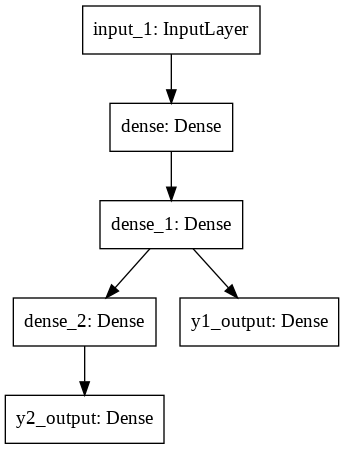

In [19]:
plot_model(model)

In [20]:
history = model.fit(norm_train_X,train_Y,epochs=500,batch_size=10,validation_data=(norm_test_X,test_Y))

Epoch 1/500
62/62 [==============================] - 2s 11ms/step - loss: 523.4157 - y1_output_loss: 254.8009 - y2_output_loss: 268.6148 - y1_output_root_mean_squared_error: 15.3685 - y2_output_root_mean_squared_error: 15.7212 - val_loss: 41.0703 - val_y1_output_loss: 17.3064 - val_y2_output_loss: 23.7639 - val_y1_output_root_mean_squared_error: 4.1601 - val_y2_output_root_mean_squared_error: 4.8748
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 35.6494 - y1_output_loss: 13.1514 - y2_output_loss: 22.4981 - y1_output_root_mean_squared_error: 3.6220 - y2_output_root_mean_squared_error: 4.7291 - val_loss: 66.4947 - val_y1_output_loss: 15.6479 - val_y2_output_loss: 50.8468 - val_y1_output_root_mean_squared_error: 3.9557 - val_y2_output_root_mean_squared_error: 7.1307
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 30.3411 - y1_output_loss: 10.4947 - y2_output_loss: 19.8464 - y1_output_root_mean_squared_error: 3.2252 - y2_output_root_mean_s

In [21]:
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse = model.evaluate(norm_test_X,test_Y)

5/5 [==============================] - 0s 3ms/step - loss: 0.9032 - y1_output_loss: 0.1967 - y2_output_loss: 0.7065 - y1_output_root_mean_squared_error: 0.4435 - y2_output_root_mean_squared_error: 0.8405


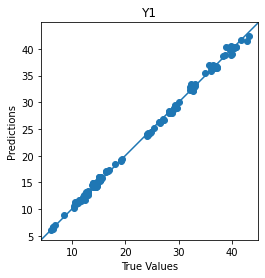

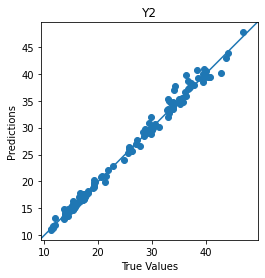

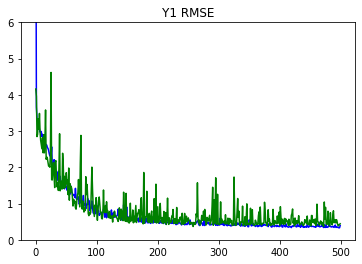

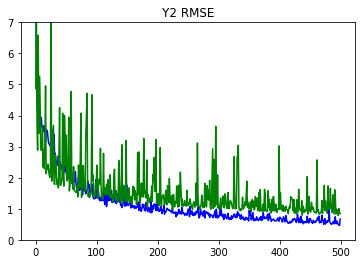

In [24]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0],Y_pred[0],title='Y1')
plot_diff(test_Y[1],Y_pred[1],title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error',title='Y1 RMSE',ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error',title='Y2 RMSE',ylim=7)